<a href="https://colab.research.google.com/github/Shamiul-693/detection_of_IoT_botnet_attacks_N_BaIoT-/blob/main/N_BaIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle



In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shamiulislam693","key":"7457fbbeb1f26124e027793803020888"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d mkashifn/nbaiot-dataset

Dataset URL: https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset
License(s): unknown
100% 1.75G/1.75G [00:14<00:00, 87.1MB/s]
100% 1.75G/1.75G [00:14<00:00, 129MB/s] 


In [5]:
!unzip /content/nbaiot-dataset.zip

Archive:  /content/nbaiot-dataset.zip
  inflating: 1.benign.csv            
  inflating: 1.gafgyt.combo.csv      
  inflating: 1.gafgyt.junk.csv       
  inflating: 1.gafgyt.scan.csv       
  inflating: 1.gafgyt.tcp.csv        
  inflating: 1.gafgyt.udp.csv        
  inflating: 1.mirai.ack.csv         
  inflating: 1.mirai.scan.csv        
  inflating: 1.mirai.syn.csv         
  inflating: 1.mirai.udp.csv         
  inflating: 1.mirai.udpplain.csv    
  inflating: 2.benign.csv            
  inflating: 2.gafgyt.combo.csv      
  inflating: 2.gafgyt.junk.csv       
  inflating: 2.gafgyt.scan.csv       
  inflating: 2.gafgyt.tcp.csv        
  inflating: 2.gafgyt.udp.csv        
  inflating: 2.mirai.ack.csv         
  inflating: 2.mirai.scan.csv        
  inflating: 2.mirai.syn.csv         
  inflating: 2.mirai.udp.csv         
  inflating: 2.mirai.udpplain.csv    
  inflating: 3.benign.csv            
  inflating: 3.gafgyt.combo.csv      
  inflating: 3.gafgyt.junk.csv       
  inflating:

In [8]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 741.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 143.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.8 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_score,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.utils import class_weight

from keras.models import Model
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Dense, Dropout,LSTM, Activation,GRU,AveragePooling1D ,BatchNormalization, Reshape,Conv1D, MaxPooling1D,GlobalMaxPooling1D,Embedding

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers



/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [10]:
device_info_dataframe=pd.read_csv("/content/device_info.csv")
device_info_dataframe

,DeviceID,DeviceName
0,1,Danmini_Doorbell
1,2,Ecobee_Thermostat
2,3,Ennio_Doorbell
3,4,Philips_B120N10_Baby_Monitor
4,5,Provision_PT_737E_Security_Camera
5,6,Provision_PT_838_Security_Camera
6,7,Samsung_SNH_1011_N_Webcam
7,8,SimpleHome_XCS7_1002_WHT_Security_Camera
8,9,SimpleHome_XCS7_1003_WHT_Security_Camera


In [11]:
Data_summary=pd.read_csv("/content/data_summary.csv")
Data_summary

,File Name,Data Count,Feature Count
0,1.benign.csv,49548,115
1,1.gafgyt.combo.csv,59718,115
2,1.gafgyt.junk.csv,29068,115
3,1.gafgyt.scan.csv,29849,115
4,1.gafgyt.tcp.csv,92141,115
...,...,...,...
84,9.mirai.ack.csv,107187,115
85,9.mirai.scan.csv,43674,115
86,9.mirai.syn.csv,122479,115
87,9.mirai.udp.csv,157084,115


In [12]:
benign_df = pd.read_csv('/content/1.benign.csv')
m_a_df = pd.read_csv('/content/1.mirai.ack.csv')
m_sc_df = pd.read_csv('/content/1.mirai.scan.csv')
m_sy_df = pd.read_csv('/content/1.mirai.syn.csv')
m_u_df = pd.read_csv('/content/1.mirai.udp.csv')
m_u_p_df = pd.read_csv('/content/1.mirai.udpplain.csv')
g_c_df = pd.read_csv('/content/1.gafgyt.combo.csv')
g_j_df = pd.read_csv('/content/1.gafgyt.junk.csv')
g_s_df = pd.read_csv('/content/1.gafgyt.scan.csv')
g_t_df = pd.read_csv('/content/1.gafgyt.tcp.csv')
g_u_df = pd.read_csv('/content/1.gafgyt.udp.csv')
benign_df1 = pd.read_csv('/content/2.benign.csv')
m_a_df1 = pd.read_csv('/content/2.mirai.ack.csv')
m_sc_df1 = pd.read_csv('/content/2.mirai.scan.csv')
m_sy_df1 = pd.read_csv('/content/2.mirai.syn.csv')
m_u_df1 = pd.read_csv('/content/2.mirai.udp.csv')
m_u_p_df1 = pd.read_csv('/content/2.mirai.udpplain.csv')
g_c_df1 = pd.read_csv('/content/2.gafgyt.combo.csv')
g_j_df1 = pd.read_csv('/content/2.gafgyt.junk.csv')
g_s_df1 = pd.read_csv('/content/2.gafgyt.scan.csv')
g_t_df1 = pd.read_csv('/content/2.gafgyt.tcp.csv')
g_u_df1 = pd.read_csv('/content/2.gafgyt.udp.csv')

In [13]:
benign_df['Attack_Class'] = 'benign     '
m_u_df['Attack_Class']    = 'mirai_udp'
m_a_df['Attack_Class']    = 'mirai_ack'
m_sc_df['Attack_Class']   = 'mirai_scan'
m_sy_df['Attack_Class']   = 'mirai_syn'
m_u_p_df['Attack_Class']  = 'mirai_udpplain'
g_c_df['Attack_Class']    = 'gafgyt_combo'
g_j_df['Attack_Class']    = 'gafgyt_junk'
g_s_df['Attack_Class']    = 'gafgyt_scan'
g_t_df['Attack_Class']    = 'gafgyt_tcp'
g_u_df['Attack_Class']    = 'gafgyt_udp'
benign_df1['Attack_Class'] = 'benign     '
m_u_df1['Attack_Class']    = 'mirai_udp'
m_a_df1['Attack_Class']    = 'mirai_ack'
m_sc_df1['Attack_Class']   = 'mirai_scan'
m_sy_df1['Attack_Class']   = 'mirai_syn'
m_u_p_df1['Attack_Class']  = 'mirai_udpplain'
g_c_df1['Attack_Class']    = 'gafgyt_combo'
g_j_df1['Attack_Class']    = 'gafgyt_junk'
g_s_df1['Attack_Class']    = 'gafgyt_scan'
g_t_df1['Attack_Class']    = 'gafgyt_tcp'
g_u_df1['Attack_Class']    = 'gafgyt_udp'

In [14]:
df = pd.concat([benign_df,
                m_u_df, m_a_df, m_sc_df,m_sy_df, m_u_p_df,
                g_c_df,g_j_df, g_s_df, g_t_df,g_u_df,
                benign_df1,m_u_df1, m_a_df1, m_sc_df1,m_sy_df1, m_u_p_df1,
                g_c_df1,g_j_df1, g_s_df1, g_t_df1,g_u_df1],
                axis=0, sort=False, ignore_index=True)

In [15]:
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Attack_Class
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign


In [16]:
df.describe()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
count,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,...,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06,1.854174e+06
mean,9.624249e+01,2.052305e+02,1.843373e+04,1.532890e+02,2.054967e+02,2.049003e+04,4.409556e+02,2.059617e+02,2.205870e+04,4.156145e+03,...,1.661179e+02,-1.204834e+01,-5.977208e-04,1.079786e+03,2.059568e+02,8.458999e-01,2.085748e+02,2.601214e+02,-1.209806e+01,-4.992637e-04
std,6.614292e+01,1.752707e+02,2.445885e+04,1.047999e+02,1.694320e+02,2.543059e+04,3.010989e+02,1.649477e+02,2.616546e+04,2.839076e+03,...,3.616173e+03,5.545478e+02,1.843718e-02,4.701589e+03,2.217342e+02,1.196102e+01,2.215277e+02,4.892830e+03,9.957348e+02,1.901132e-02
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,0.000000e+00,-4.005854e+04,-1.010724e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-3.946335e+04,-6.909109e-01
25%,5.651449e+00,6.000000e+01,9.549694e-12,9.922579e+00,6.000003e+01,7.703394e-07,3.388566e+01,6.000441e+01,2.994025e-02,6.591560e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.119862e+02,7.405775e+01,3.912630e+01,1.883428e+02,7.407237e+01,4.195164e+01,5.938914e+02,7.417800e+01,4.477901e+01,5.772012e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.400000e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.493385e+02,3.696621e+02,4.401520e+04,2.360834e+02,3.788219e+02,4.862206e+04,6.655166e+02,3.882432e+02,5.171356e+04,6.418587e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.540000e+02,0.000000e+00,5.540000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,4.380028e+02,1.108155e+03,2.721017e+05,5.058053e+02,1.090333e+03,2.693159e+05,1.185250e+03,9.404513e+02,2.416279e+05,8.912649e+03,...,4.340505e+05,6.036894e+04,9.560988e-01,3.000666e+04,9.090000e+02,3.216536e+02,1.278265e+03,4.793690e+05,1.365841e+05,1.531981e+00


In [17]:
df.shape

(1854174, 116)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854174 entries, 0 to 1854173
Columns: 116 entries, MI_dir_L5_weight to Attack_Class
dtypes: float64(115), object(1)
memory usage: 1.6+ GB


In [19]:
df.columns

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight',
       'HpHp_L0.01_mean', 'HpHp_L0.01_std', 'HpHp_L0.01_magnitude',
       'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc',
       'Attack_Class'],
      dtype='object', length=116)

In [20]:
list(df.columns)

['MI_dir_L5_weight',
 'MI_dir_L5_mean',
 'MI_dir_L5_variance',
 'MI_dir_L3_weight',
 'MI_dir_L3_mean',
 'MI_dir_L3_variance',
 'MI_dir_L1_weight',
 'MI_dir_L1_mean',
 'MI_dir_L1_variance',
 'MI_dir_L0.1_weight',
 'MI_dir_L0.1_mean',
 'MI_dir_L0.1_variance',
 'MI_dir_L0.01_weight',
 'MI_dir_L0.01_mean',
 'MI_dir_L0.01_variance',
 'H_L5_weight',
 'H_L5_mean',
 'H_L5_variance',
 'H_L3_weight',
 'H_L3_mean',
 'H_L3_variance',
 'H_L1_weight',
 'H_L1_mean',
 'H_L1_variance',
 'H_L0.1_weight',
 'H_L0.1_mean',
 'H_L0.1_variance',
 'H_L0.01_weight',
 'H_L0.01_mean',
 'H_L0.01_variance',
 'HH_L5_weight',
 'HH_L5_mean',
 'HH_L5_std',
 'HH_L5_magnitude',
 'HH_L5_radius',
 'HH_L5_covariance',
 'HH_L5_pcc',
 'HH_L3_weight',
 'HH_L3_mean',
 'HH_L3_std',
 'HH_L3_magnitude',
 'HH_L3_radius',
 'HH_L3_covariance',
 'HH_L3_pcc',
 'HH_L1_weight',
 'HH_L1_mean',
 'HH_L1_std',
 'HH_L1_magnitude',
 'HH_L1_radius',
 'HH_L1_covariance',
 'HH_L1_pcc',
 'HH_L0.1_weight',
 'HH_L0.1_mean',
 'HH_L0.1_std',
 'HH_L0.1

In [21]:
df.columns.values

array(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'MI_dir_L0.01_weight', 'MI_dir_L0.01_mean',
       'MI_dir_L0.01_variance', 'H_L5_weight', 'H_L5_mean',
       'H_L5_variance', 'H_L3_weight', 'H_L3_mean', 'H_L3_variance',
       'H_L1_weight', 'H_L1_mean', 'H_L1_variance', 'H_L0.1_weight',
       'H_L0.1_mean', 'H_L0.1_variance', 'H_L0.01_weight', 'H_L0.01_mean',
       'H_L0.01_variance', 'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std',
       'HH_L5_magnitude', 'HH_L5_radius', 'HH_L5_covariance', 'HH_L5_pcc',
       'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std', 'HH_L3_magnitude',
       'HH_L3_radius', 'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight',
       'HH_L1_mean', 'HH_L1_std', 'HH_L1_magnitude', 'HH_L1_radius',
       'HH_L1_covariance', 'HH_L1_pcc', 'HH_L0.

##Exploration Data Analysis

In [22]:
df.isnull().sum()   # Identifying Missing Values

,0
MI_dir_L5_weight,0
MI_dir_L5_mean,0
MI_dir_L5_variance,0
MI_dir_L3_weight,0
MI_dir_L3_mean,0
...,...
HpHp_L0.01_magnitude,0
HpHp_L0.01_radius,0
HpHp_L0.01_covariance,0
HpHp_L0.01_pcc,0


In [23]:
null_percentage_per_column = df.isnull().sum()/len(df) * 100
print(null_percentage_per_column)


MI_dir_L5_weight         0.0
MI_dir_L5_mean           0.0
MI_dir_L5_variance       0.0
MI_dir_L3_weight         0.0
MI_dir_L3_mean           0.0
                        ... 
HpHp_L0.01_magnitude     0.0
HpHp_L0.01_radius        0.0
HpHp_L0.01_covariance    0.0
HpHp_L0.01_pcc           0.0
Attack_Class             0.0
Length: 116, dtype: float64


In [24]:
df.duplicated().sum()

np.int64(322367)

In [25]:
df.groupby('Attack_Class').size()

,0
Attack_Class,
benign,62661
gafgyt_combo,112730
gafgyt_junk,59380
gafgyt_scan,57343
gafgyt_tcp,187162
gafgyt_udp,210665
mirai_ack,215480
mirai_scan,150877
mirai_syn,239380


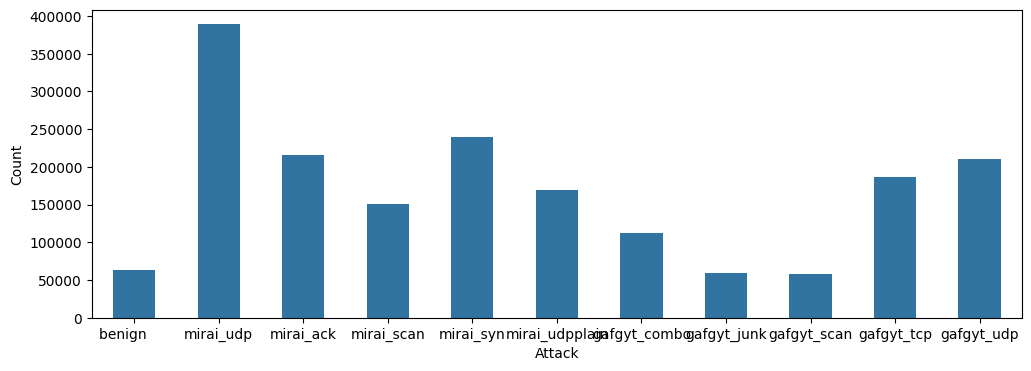

In [26]:
plt.figure(figsize=(12, 4))  # Adjust the width and height
sns.countplot(x = df["Attack_Class"],width=0.5,)
plt.xlabel('Attack')
plt.ylabel('Count')
plt.show()

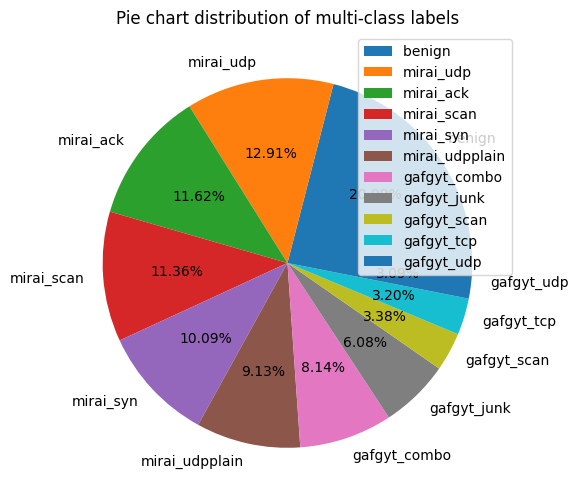

In [27]:
plt.figure(figsize=(6,6))
plt.pie(df['Attack_Class'].value_counts(),autopct='%0.2f%%',labels=df.Attack_Class.unique())
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

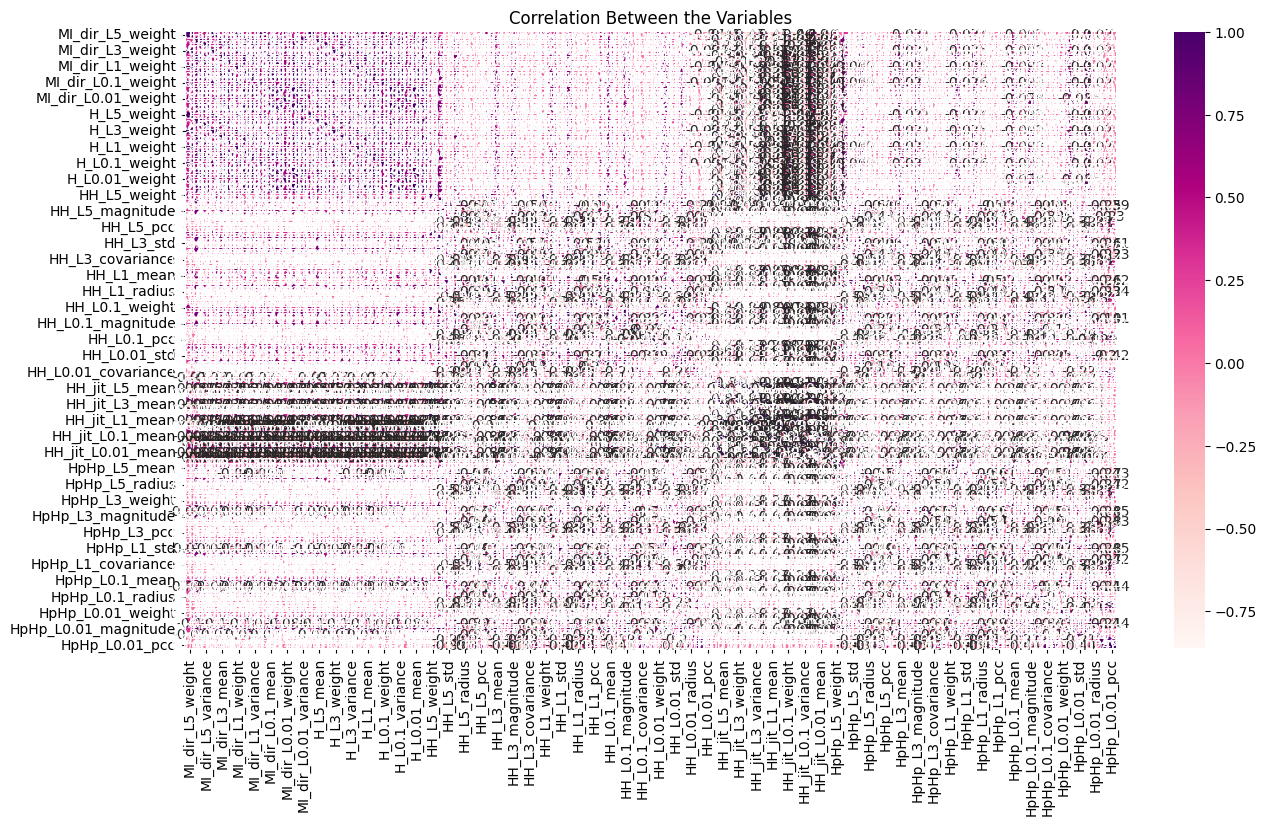

In [28]:
numeric_data = df.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

##Data Preprocessing

In [29]:
print(df.duplicated().sum(), "fully duplicate rows to remove")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

322367 fully duplicate rows to remove


(1531807, 116)

In [30]:
class_counts = df["Attack_Class"].value_counts()
total_samples = class_counts.sum()
# Display the classes along with the number of samples
print("Serial\tAttack_Class\t\tNumber of Samples")
print("-----------------------------------")
serial_number = 1
for class_name, count in class_counts.items():
    print(f"{serial_number}\t{class_name}\t\t{count}")
    serial_number += 1
print("-----------------------------------")
print(f"Total Samples:                  {total_samples}")

Serial	Attack_Class		Number of Samples
-----------------------------------
1	mirai_udp		389146
2	mirai_syn		239380
3	mirai_ack		215480
4	mirai_udpplain		169350
5	mirai_scan		150877
6	gafgyt_udp		105807
7	gafgyt_tcp		87877
8	gafgyt_combo		59718
9	benign     		53506
10	gafgyt_junk		30816
11	gafgyt_scan		29850
-----------------------------------
Total Samples:                  1531807


In [31]:
label_columns = "Attack_Class"
feature_columns = list(df.columns)
feature_columns.remove(label_columns)
X = df[feature_columns]
y = df[label_columns]

In [32]:
cls_label_encoder = LabelEncoder()
y = cls_label_encoder.fit_transform(y)
unique_values = cls_label_encoder.classes_
print("Unique encoded values:", unique_values)

Unique encoded values: ['benign     ' 'gafgyt_combo' 'gafgyt_junk' 'gafgyt_scan' 'gafgyt_tcp'
 'gafgyt_udp' 'mirai_ack' 'mirai_scan' 'mirai_syn' 'mirai_udp'
 'mirai_udpplain']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,stratify=y)

#Min-Max Scaling (Normalization)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#One-hot encoded

In [36]:
n_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [37]:
input_shape = X_train.shape[1:]
print(input_shape)

(115, 1)


##LSTM MODEL

In [38]:
input_1 = Input (X_train.shape[1:],name='Inputlayer')

x = LSTM(16, return_sequences=True,activation='relu')(input_1)
x = BatchNormalization()(x)
x = LSTM(32, return_sequences=True,activation='relu')(x)
x = Dropout(0.1)(x)
x = LSTM(16, return_sequences=True,activation='relu')(x)
x = BatchNormalization()(x)
x = LSTM(32)(x)
output_layer = Dense(11, activation='softmax')(x)

model_lstm = Model(inputs=input_1, outputs=output_layer)
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (InputLayer)         │ (None, 115, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 115, 16)        │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 115, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 115, 32)        │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 115, 16)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 115, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,323 (67.67 KB)

 Trainable params: 17,259 (67.42 KB)

 Non-trainable params: 64 (256.00 B)

In [39]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  min_delta=0.001,patience=3,
                                             mode='min',baseline=None, restore_best_weights=True )
history_lstm=model_lstm.fit(X_train, y_train,epochs=50,batch_size=512,validation_data=(X_train, y_train),callbacks=[stop_early],verbose=1)

Epoch 1/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 634s 263ms/step - accuracy: 0.6842 - loss: 0.7787 - val_accuracy: 0.8641 - val_loss: 0.3235
Epoch 2/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 632s 264ms/step - accuracy: 0.8452 - loss: 0.2975 - val_accuracy: 0.6995 - val_loss: 0.9945
Epoch 3/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 642s 268ms/step - accuracy: 0.8528 - loss: 0.2774 - val_accuracy: 0.8890 - val_loss: 0.1919
Epoch 4/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 638s 266ms/step - accuracy: 0.8922 - loss: 0.1998 - val_accuracy: 0.8775 - val_loss: 0.2217
Epoch 5/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 640s 267ms/step - accuracy: 0.9100 - loss: 0.1689 - val_accuracy: 0.7100 - val_loss: 0.8611
Epoch 6/50
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 633s 264ms/step - accuracy: 0.9128 - loss: 0.1586 - val_accuracy: 0.8061 - val_loss: 0.4861


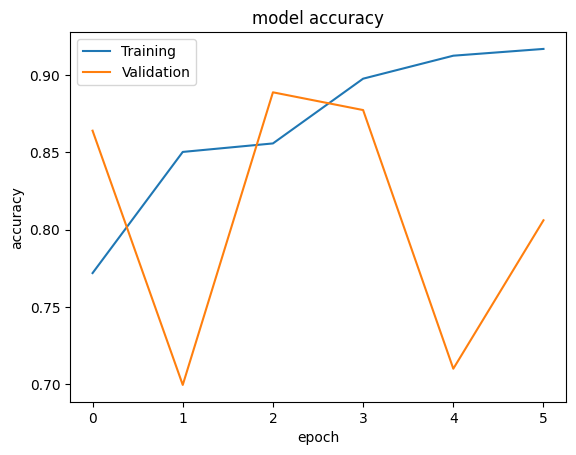

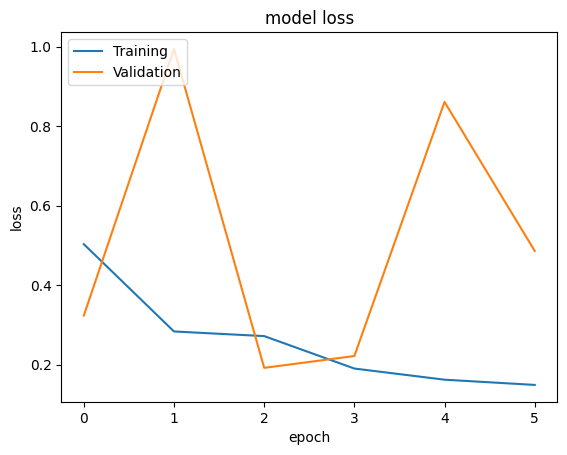

In [40]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training','Validation'], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history_lstm.history[ 'loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title( 'model loss')
plt.ylabel( 'loss' )
plt.xlabel( 'epoch')
plt.legend(['Training' , 'Validation' ], loc= 'upper left' )
plt.show()

##tuning

In [41]:
def model_builder_LSTM(hp):
    model = keras.Sequential()

    # Tune the number of LSTM layers
    num_lstm_layers = hp.Int('num_lstm_layers', min_value=1, max_value=5, step=1)
    model.add(layers.LSTM(units=64,activation="relu",return_sequences=True, input_shape=X_train.shape[1:]))
    for i in range(num_lstm_layers):
        model.add(layers.LSTM(hp.Choice(name='units', values=[32, 64, 128, 256]),
                                activation='relu',return_sequences=True,))
        model.add(layers.BatchNormalization())
    model.add(layers.LSTM(units=32,activation="relu",return_sequences=False))
    # Final dense layer with softmax activation for classification
    model.add(layers.Dense(11, activation='softmax'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [43]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner

model_builder_LSTM(keras_tuner.HyperParameters())
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner = keras_tuner.RandomSearch(
    model_builder_LSTM,
    objective='val_accuracy',
    max_trials=5,
    overwrite=True)

tuner.search(X_train, y_train, epochs=3, validation_data=(X_train,y_train),callbacks=[stop_early])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
4                 |4                 |num_lstm_layers
128               |128               |units
0.001             |0.001             |learning_rate

Epoch 1/3
 6238/38296 ━━━━━━━━━━━━━━━━━━━━ 2:32:21 285ms/step - accuracy: 0.0390 - loss: nan

In [ ]:
best_model = tuner.get_best_models()[0]
tuner.results_summary()

In [ ]:
model = tuner.hypermodel.build(best_hps)
history_H_lstm = model.fit(X_train,y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history_H_lstm.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
plt.plot(history_H_lstm.history['accuracy'])
plt.plot(history_H_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training','Validation'], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history_H_lstm.history[ 'loss'])
plt.plot(history_H_lstm.history['val_loss'])
plt.title( 'Model loss')
plt.ylabel( 'loss' )
plt.xlabel( 'epoch')
plt.legend(['Training' , 'Validation' ], loc= 'upper left' )
plt.show()